In [3]:
%load_ext autoreload
%autoreload 2

import os
from pathlib import Path

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from vr2f.staticinfo import COLORS, PATHS, CONSTANTS
from vr2f.eyetracking import ms_toolbox

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [17]:
paths = PATHS()
colors = COLORS()
constants = CONSTANTS()
cm = constants.CM

In [7]:
# read in the preprocessed data
pattern = "preproc.csv"

sub_list_str_et = [f for f in os.listdir(paths.DATA_ET_PREPROC) if pattern in f]
sub_list_str_et = [f.split("-")[0] for f in sub_list_str_et]
sub_list_str_et = np.unique(sorted(sub_list_str_et))

data_preproc = []
for sub_id in sorted(sub_list_str_et):
    fname = Path(paths.DATA_ET_PREPROC, f"{sub_id}-ET-{pattern}")
    df_clean = pd.read_csv(fname, sep=",")
    df_clean["sub_id"] = sub_id
    data_preproc.append(df_clean)

df_all = pd.concat(data_preproc, ignore_index=True)

In [11]:
# plot vertical gaze for 1 trial

def get_data_sub_trialnum(df_data, sub_id, trial_num):
    df_data_sub = (df_data
                    .query("sub_id == @sub_id")
                    .query("trial_num == @trial_num")
    )
    return df_data_sub

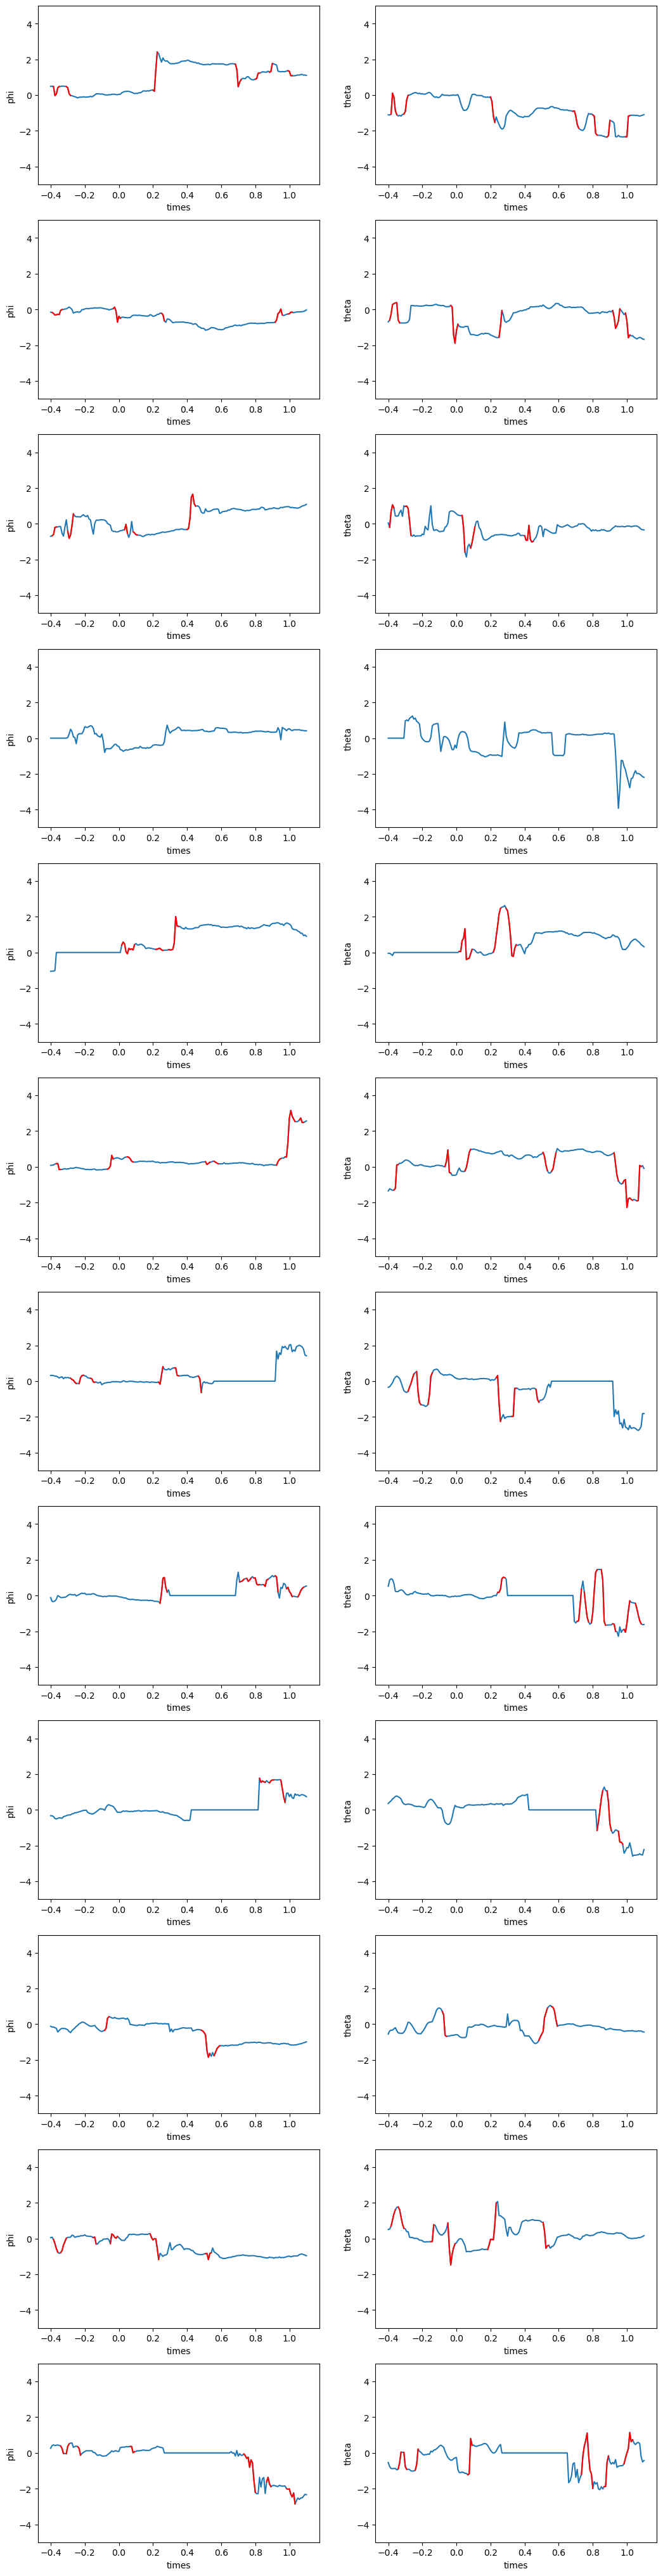

In [79]:
trial_range = range(621,633)
n_trials = len(trial_range)
fig, ax = plt.subplots(n_trials, 2, figsize=(32 * cm, n_trials * 11 * cm))

for i, trial_idx in enumerate(trial_range):
  df_st = get_data_sub_trialnum(df_all, sub_list_str_et[0], trial_idx)

  data = df_st.loc[:,["theta", "phi"]].to_numpy()
  sac, rad = ms_toolbox.microsacc(data, 120, vfac=5, mindur=3)
  sac["amp_tot"] = np.sqrt(sac["amp_x"]**2 + sac["amp_y"]**2)
  times = df_st["times"]

  df_st["phi"][df_st["blink"]] = 0
  df_st["theta"][df_st["blink"]] = 0

  axs = ax[i,:]
  sns.lineplot(data=df_st, x="times", y="phi", ax=axs[0])
  axs[0].set_ylim([-5,5])
  sns.lineplot(data=df_st, x="times", y="theta", ax=axs[1])
  axs[1].set_ylim([-5,5])

  for idx, s in sac.iterrows():
    if s["amp_tot"] < 1:
      continue
    a = int(s["idx_onset"])
    b = int(s["idx_offset"])
    df_plt = df_st.copy().iloc[a:(b+1),:]
    sns.lineplot(data=df_plt, x="times", y="phi", ax=axs[0], color="red")
    sns.lineplot(data=df_plt, x="times", y="theta", ax=axs[1], color="red")
  

In [69]:
dd = get_data_sub_trialnum(df_all, sub_list_str_et[10], 2)
dd

,level_0,index,time,timestamp_et,timestamp_lsl,direction_x_local,direction_y_local,direction_z_local,position_x_local,position_y_local,...,times,trial_num,marker,viewcond,avatar_id,emotion,blink,theta_baseline,phi_baseline,sub_id
1346821,260,29,109.8892,810677,26580.500031,1.000000,-1.000000,-1.000000,0.001000,-0.001000,...,-0.400000,2,231,stereo,Woman_08,neutral,True,NaN,NaN,VR2FEM_S16
1346822,261,30,109.9000,810685,26580.508572,1.000000,-1.000000,-1.000000,0.001000,-0.001000,...,-0.391667,2,231,stereo,Woman_08,neutral,True,NaN,NaN,VR2FEM_S16
1346823,262,31,109.9113,810694,26580.517052,1.000000,-1.000000,-1.000000,0.001000,-0.001000,...,-0.383333,2,231,stereo,Woman_08,neutral,True,NaN,NaN,VR2FEM_S16
1346824,263,32,109.9222,810702,26580.525391,1.000000,-1.000000,-1.000000,0.001000,-0.001000,...,-0.375000,2,231,stereo,Woman_08,neutral,True,NaN,NaN,VR2FEM_S16
1346825,264,33,109.9334,810710,26580.534082,1.000000,-1.000000,-1.000000,0.001000,-0.001000,...,-0.366667,2,231,stereo,Woman_08,neutral,True,NaN,NaN,VR2FEM_S16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1346997,436,205,111.3556,812143,26581.966568,-0.016083,-0.046753,0.998764,0.029433,0.002588,...,1.066667,2,231,stereo,Woman_08,neutral,True,NaN,NaN,VR2FEM_S16
1346998,437,206,111.3668,812152,26581.975013,-0.017105,-0.035065,0.999237,0.031688,0.002497,...,1.075000,2,231,stereo,Woman_08,neutral,True,NaN,NaN,VR2FEM_S16
1346999,438,207,111.3778,812160,26581.983385,-0.011688,-0.038879,0.999161,0.030906,0.002513,...,1.083333,2,231,stereo,Woman_08,neutral,True,NaN,NaN,VR2FEM_S16
1347000,439,208,111.3890,812168,26581.991600,-0.008530,-0.036621,0.999283,0.031091,0.002551,...,1.091667,2,231,stereo,Woman_08,neutral,True,NaN,NaN,VR2FEM_S16


In [58]:
ax.flat[0]

<AxesSubplot:>